<a href="https://colab.research.google.com/github/rainardw/TUGAS-BESAR-BIG-DATA-CCTV-KOTA-MATARAM/blob/main/TUGAS_BESAR_CCTV_KOTA_MATARAM_WITH_COMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import string
from datetime import datetime, timedelta
import pandas as pd

In [179]:
def random_visual_string(min_len=50, max_len=200):
    length = random.randint(min_len, max_len)
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

In [180]:
locations = [
    "Karang Pule", "Gajah Mada", "Cakranegara", "Ampenan", "Majapahit", "Islamic Center NTB",
    "UNRAM Gate", "Kantor Walikota Mataram", "Sandubaya", "Panji Tilar", "Jalan Pemuda", "Swakarya", "Sriwijaya",
    "Lombok Epicentrum Mall", "Pagesangan", "Pejanggik",
    "Rembiga", "Sayang-Sayang", "Pagutan"
]

weather = ["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat", "Hujan Petir", "Kabut"]
directions = ["Utara → Selatan", "Selatan → Utara", "Timur → Barat", "Barat → Timur"]
vehicle_types = ["Motor", "Mobil", "Truk", "Bus"]

In [177]:
plate_prefixes = (
    ["DR"] * 50 +
    ["EA"] * 30 +
    ["B"] * 5 +
    ["AB"] * 5 +
    ["AD"] * 5 +
    ["N"] * 5
)

def generate_plate():
    prefix = random.choice(plate_prefixes)
    middle = str(random.randint(1000, 9999))
    suffix = "".join(random.choices(string.ascii_uppercase, k=2))
    return prefix + middle + suffix

def random_visual_string(size=120):
    return ''.join(random.choices(string.ascii_letters + string.digits, k=size))

# Buat dataset
data = []
start_time = datetime(2025, 9, 18, 6, 0, 0)

for i in range(1000):
    timestamp = start_time + timedelta(seconds=i * random.randint(5, 15))

    vehicle_count = random.randint(50, 300)
    speed = random.uniform(15, 80)
    density = random.randint(100, 500)
    congestion_duration = random.randint(0, 60)
    visibility = random.randint(20, 150)
    motion_density = random.uniform(0.1, 1.0)
    brightness = random.randint(30, 100)

    vehicle_type = random.choice(vehicle_types)
    plate = generate_plate()

    data.append([
        i + 1, timestamp, random.choice(locations), vehicle_count, speed,
        density, congestion_duration, visibility, motion_density, brightness,
        random.choice(weather), random.choice(directions),
        vehicle_type, plate, random_visual_string()
    ])

df = pd.DataFrame(data, columns=[
    "id", "timestamp", "location", "vehicle_count", "speed",
    "density", "congestion_duration", "visibility", "motion_density",
    "brightness", "weather", "direction", "vehicle_type",
    "plate_number", "visual_data"
])

pd.set_option("display.max_rows", 1000)
df

,id,timestamp,location,vehicle_count,speed,density,congestion_duration,visibility,motion_density,brightness,weather,direction,vehicle_type,plate_number,visual_data
0,1,2025-09-18 06:00:00,Islamic Center NTB,78,32.098483,446,22,120,0.561129,53,Hujan Petir,Selatan → Utara,Bus,DR9365JN,gpyzDjaq0B4b2u5hPCP5BtRydOTLSv4bf4dzOLscFhcYaO...
1,2,2025-09-18 06:00:06,Jalan Pemuda,228,27.850064,198,13,132,0.215093,48,Hujan Lebat,Utara → Selatan,Mobil,DR7089ZU,eqyYwbYwvmE1AsmVJkKlFtysjpg5sZ0RZdP4KaWPYmCeM7...
2,3,2025-09-18 06:00:20,Sayang-Sayang,186,21.907983,204,37,150,0.890710,67,Kabut,Barat → Timur,Truk,DR9469WI,pifuAHiMEuQLIgo9J4YFNzwdLHyoO8j3tIz8FDekOPYjvN...
3,4,2025-09-18 06:00:30,Sriwijaya,83,28.611769,147,46,120,0.965517,62,Berawan,Utara → Selatan,Truk,EA7807RY,xr2kZcDENVxluWTnN8wCYUL7GYvLQzMywsZjPEHOLVBpxp...
4,5,2025-09-18 06:00:52,Cakranegara,215,73.521947,328,46,42,0.315832,72,Kabut,Timur → Barat,Truk,DR2373CO,NnnTOgsR4p5qKCaUGdLYqJpi850FTzJ81YvngJHIxtaLLb...
5,6,2025-09-18 06:00:30,UNRAM Gate,138,51.207708,325,38,64,0.745966,73,Hujan Lebat,Utara → Selatan,Motor,DR4280OZ,Z6lwgD8NZL5HvN4mnDu1QoF25ZX3VyynoQ1wSQva2rLqJY...
6,7,2025-09-18 06:00:36,Sayang-Sayang,108,76.222715,388,31,81,0.202041,88,Cerah,Timur → Barat,Truk,DR9967MF,0VQBh6dAwUvfhzZqgwqhVXSIH9jn5EDAlMtnmNobDwgx13...
7,8,2025-09-18 06:01:10,Swakarya,140,61.128652,363,13,77,0.348073,86,Hujan Lebat,Utara → Selatan,Mobil,DR3700TZ,y2Xs9JVsZ2hZKUQlXuch850ic7pm0fQpyTLNMbqCW9O6RH...
8,9,2025-09-18 06:01:20,Gajah Mada,100,61.350951,492,7,95,0.572770,94,Hujan Lebat,Barat → Timur,Truk,DR4312XO,C90qdbavAba0A4U9J9AIzhlEVy8GnTQBGlu8NnSR15W8qz...
9,10,2025-09-18 06:01:12,Sandubaya,285,26.973587,404,54,79,0.241985,60,Hujan Ringan,Selatan → Utara,Motor,DR1190ZX,NMmzCCgstW11heYbceOexU77AYM0Ur4rVoA9szW14O0k9C...


In [193]:
url = "https://raw.githubusercontent.com/rainardw/TUGAS-BESAR-BIG-DATA-CCTV-KOTA-MATARAM/main/dataset_cctv_mataram_1000.csv"
df = pd.read_csv(url)

In [174]:
df.describe()

,jumlah_kendaraan,kecepatan_km_jam,kepadatan_kendaraan_per_km,durasi_kemacetan_menit,visibilitas_meter,frame_width,frame_height,vehicle_count_per_frame,brightness_level,motion_density
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1024.733000,28.539450,293.878820,19.736000,70.015000,1288.320000,724.680000,12.929000,0.601210,0.511370
std,443.835419,12.117931,149.150229,9.651085,17.974589,515.778252,290.125267,7.058313,0.229926,0.230446
min,300.000000,8.010000,69.600000,0.000000,40.000000,640.000000,360.000000,1.000000,0.200000,0.100000
25%,684.750000,18.032500,181.550000,13.000000,54.000000,640.000000,360.000000,7.000000,0.400000,0.310000
50%,979.500000,28.235000,266.970000,20.000000,71.000000,1280.000000,720.000000,13.000000,0.590000,0.520000
75%,1300.000000,38.915000,370.070000,26.000000,85.250000,1920.000000,1080.000000,19.000000,0.810000,0.710000
max,1998.000000,49.930000,796.400000,58.000000,100.000000,1920.000000,1080.000000,25.000000,1.000000,0.900000


In [162]:
!pip install pyspark -q

from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [182]:
df_encoded = df.copy()

# Create 'traffic_status' column based on 'speed' and 'density'
def get_traffic_status(row):
    speed = row['speed']
    density = row['density']
    if speed > 60 and density < 200:
        return 'Lancar' # Smooth
    elif 30 < speed <= 60 and 200 <= density < 400:
        return 'Normal' # Normal
    else:
        return 'Padat' # Congested

df_encoded['traffic_status'] = df_encoded.apply(get_traffic_status, axis=1)

label_cols = ["location", "weather", "direction", "vehicle_type", "plate_number", "visual_data", "traffic_status"]
encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le

In [184]:
X = df_encoded.drop(columns=["traffic_status", "timestamp"])
y = df_encoded["traffic_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [185]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, dt_pred))

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00       131

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [186]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.76      0.87        51
           2       0.92      1.00      0.96       131

    accuracy                           0.94       200
   macro avg       0.97      0.92      0.94       200
weighted avg       0.95      0.94      0.94       200



In [187]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print("=== KNN Classification Report ===")
print(classification_report(y_test, knn_pred))

=== KNN Classification Report ===
              precision    recall  f1-score   support

           0       0.29      0.11      0.16        18
           1       0.41      0.18      0.25        51
           2       0.67      0.87      0.75       131

    accuracy                           0.62       200
   macro avg       0.45      0.39      0.39       200
weighted avg       0.57      0.62      0.57       200



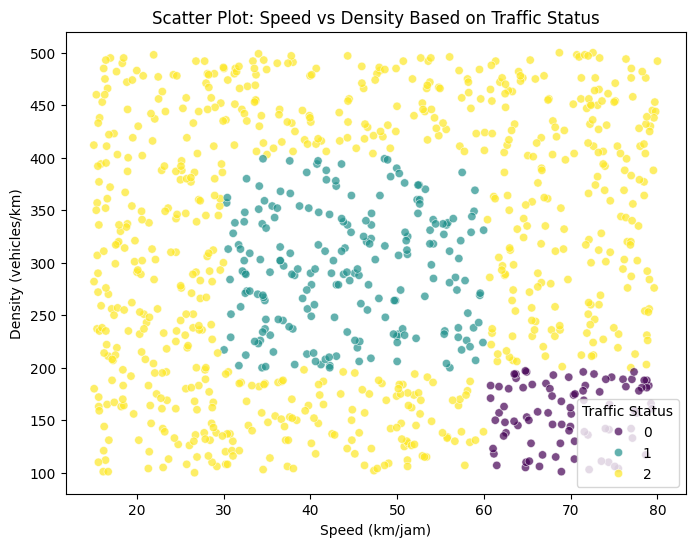

In [189]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_encoded,
    x="speed",
    y="density",
    hue="traffic_status",
    palette="viridis",
    alpha=0.7
)
plt.title("Scatter Plot: Speed vs Density Based on Traffic Status")
plt.xlabel("Speed (km/jam)")
plt.ylabel("Density (vehicles/km)")
plt.legend(title="Traffic Status")
plt.show()

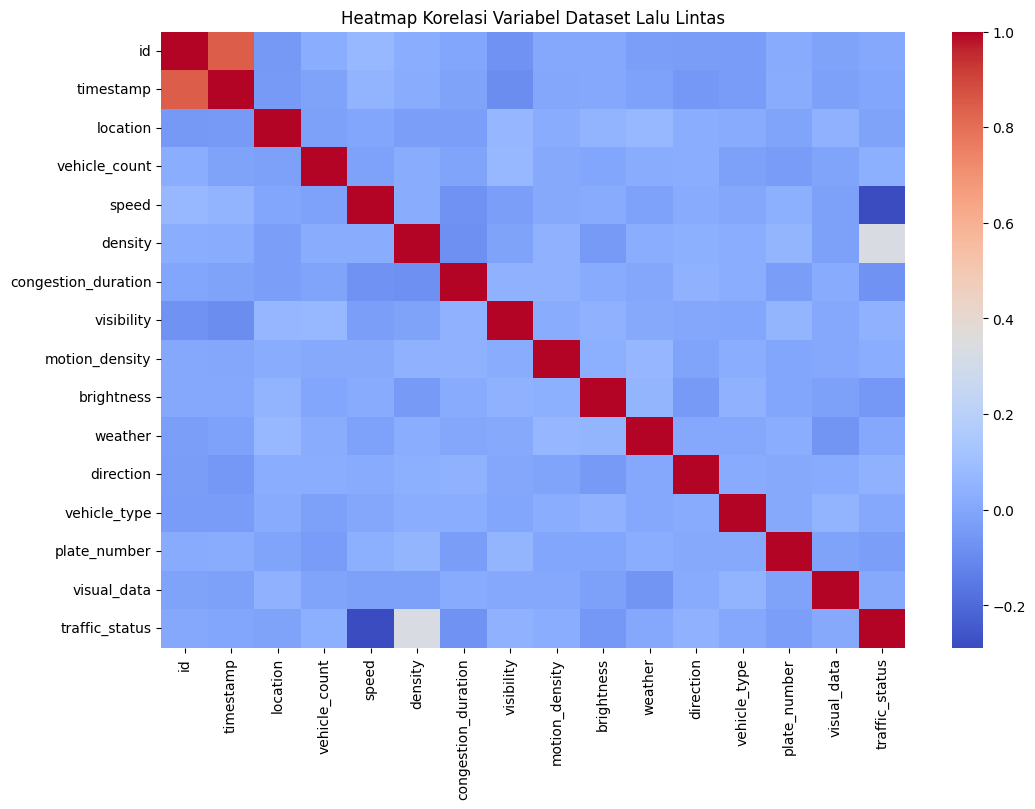

In [190]:
plt.figure(figsize=(12, 8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Heatmap Korelasi Variabel Dataset Lalu Lintas")
plt.show()

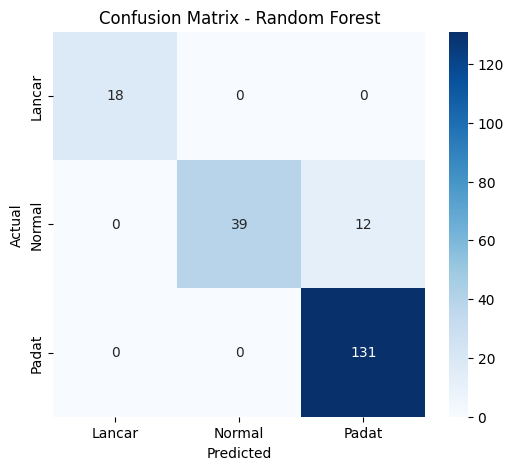

In [191]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoders["traffic_status"].classes_,
            yticklabels=encoders["traffic_status"].classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [192]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test, dt_pred)
acc_rf = accuracy_score(y_test, rf_pred)
acc_knn = accuracy_score(y_test, knn_pred)

print("Akurasi Decision Tree :", acc_dt)
print("Akurasi Random Forest :", acc_rf)
print("Akurasi KNN :", acc_knn)

best_model = max([("Decision Tree", acc_dt),
                  ("Random Forest", acc_rf),
                  ("KNN", acc_knn)], key=lambda x: x[1])
print("\nModel terbaik adalah:", best_model[0], "dengan akurasi", best_model[1])

Akurasi Decision Tree : 1.0
Akurasi Random Forest : 0.94
Akurasi KNN : 0.625

Model terbaik adalah: Decision Tree dengan akurasi 1.0
